### Pandas 
Pandas is the core package for data analytics 
Built on top Numpy,It provides a higher-level interface
Core data structure: Series and dataframe
### Getting started with pandas

In [1]:
import pandas as pd
from pandas import Series,DataFrame

## Series
A pandas. Series is a one-dimensional array-like object

In [2]:
data =Series([4,-1,3,2])
data

0    4
1   -1
2    3
3    2
dtype: int64

In [3]:
data[0]

4

In [4]:
data.values

array([ 4, -1,  3,  2], dtype=int64)

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
data = Series([4,-1,3,2], index=['a','b','c','d'])
data

a    4
b   -1
c    3
d    2
dtype: int64

In [7]:
data[0]

4

In [8]:
data['a']

4

In [9]:
data[['a','b']]

a    4
b   -1
dtype: int64

In [10]:
data[data>0]

a    4
c    3
d    2
dtype: int64

In [11]:
data * 2

a    8
b   -2
c    6
d    4
dtype: int64

In [12]:
import numpy as np
np.exp(data)

a    54.598150
b     0.367879
c    20.085537
d     7.389056
dtype: float64

city_data = {'London':8.6,'Paris':2.2,'Berlin':3.6}
data = Series(city_data, index=['Berlin','London','Madrid','Paris','Rome'])
data

In [13]:
city_data = {'London':8.6,'Paris':2.2,'Berlin':3.6} 

data = Series(city_data, index=['Berlin','London','Madrid','Paris','Rome']) 
data

Berlin    3.6
London    8.6
Madrid    NaN
Paris     2.2
Rome      NaN
dtype: float64

### Data Frames
A Pandas.dataframe is a table-like structure

In [14]:
purchases = [{'Customer':'Bob','Item':'Oranges','Quantity':2,'Unit price':2},
             {'Customer':'Bob','Item':'Apples','Quantity':3,'Unit price':1},
             {'Customer':'Bob','Item':'Milk','Quantity':1,'Unit price':4},
             {'Customer':'Alice','Item':'Oranges','Quantity':2,'Unit price':2},
             {'Customer':'Alice','Quantity':2,'Unit price':3}]
df = DataFrame(purchases) 
df

,Customer,Item,Quantity,Unit price
0,Bob,Oranges,2,2
1,Bob,Apples,3,1
2,Bob,Milk,1,4
3,Alice,Oranges,2,2
4,Alice,NaN,2,3


In [15]:
df.loc[0]

Customer          Bob
Item          Oranges
Quantity            2
Unit price          2
Name: 0, dtype: object

In [16]:
df['Item']

0    Oranges
1     Apples
2       Milk
3    Oranges
4        NaN
Name: Item, dtype: object

In [17]:
df.loc[0,'Item']

'Oranges'

In [18]:
df.loc[0:2, ['Item','Quantity']]

,Item,Quantity
0,Oranges,2
1,Apples,3
2,Milk,1


### Boolean indexing

In [19]:
is_alice = df['Customer'] == 'Alice'
is_alice

0    False
1    False
2    False
3     True
4     True
Name: Customer, dtype: bool

In [20]:
df[is_alice]

,Customer,Item,Quantity,Unit price
3,Alice,Oranges,2,2
4,Alice,NaN,2,3


### Modifying the dataframe

In [22]:
df['Total cost'] = df['Unit price'] * df['Quantity']
df

,Customer,Item,Quantity,Unit price,Total cost
0,Bob,Oranges,2,2,4
1,Bob,Apples,3,1,3
2,Bob,Milk,1,4,4
3,Alice,Oranges,2,2,4
4,Alice,NaN,2,3,6


In [23]:
del df['Total cost']

In [24]:
df

,Customer,Item,Quantity,Unit price
0,Bob,Oranges,2,2
1,Bob,Apples,3,1
2,Bob,Milk,1,4
3,Alice,Oranges,2,2
4,Alice,NaN,2,3


In [25]:
df.drop(4)

,Customer,Item,Quantity,Unit price
0,Bob,Oranges,2,2
1,Bob,Apples,3,1
2,Bob,Milk,1,4
3,Alice,Oranges,2,2


In [26]:
df

,Customer,Item,Quantity,Unit price
0,Bob,Oranges,2,2
1,Bob,Apples,3,1
2,Bob,Milk,1,4
3,Alice,Oranges,2,2
4,Alice,NaN,2,3


In [27]:
new_df = df.drop(3)
new_df

,Customer,Item,Quantity,Unit price
0,Bob,Oranges,2,2
1,Bob,Apples,3,1
2,Bob,Milk,1,4
4,Alice,NaN,2,3


In [28]:
df.drop(3, inplace =True)
df

,Customer,Item,Quantity,Unit price
0,Bob,Oranges,2,2
1,Bob,Apples,3,1
2,Bob,Milk,1,4
4,Alice,NaN,2,3


In [29]:
df.loc[4,'Item']='Oranges'
df

,Customer,Item,Quantity,Unit price
0,Bob,Oranges,2,2
1,Bob,Apples,3,1
2,Bob,Milk,1,4
4,Alice,Oranges,2,3


In [31]:
data = pd.read_csv('empdata.csv')
data

,empid,ename,sal,doj
0,1001,Ganesh Rao,10000.00,10-10-2000
1,1002,Anil Kumar,23000.50,3-3-2002
2,1003,Gaurav Gupta,18000.33,3-3-2002
3,1004,Hema Chandra,16500.50,3-3-2002
4,1005,Laxmi Prasanna,12000.75,10-8-2000
5,1006,Anant Nag,9999.99,9-9-1999


### Reindexing
Reindexing is the process of creating a new object with the data confromed to a new index

In [36]:
data = pd.Series([3,2,1], index=['b','a','d'])
data

b    3
a    2
d    1
dtype: int64

In [37]:
new_data = data.reindex(['a','b','c','d'])
new_data

a    2.0
b    3.0
c    NaN
d    1.0
dtype: float64

### Applying a function

In [39]:
data = pd.DataFrame([[4,36,1],[9,25,16]],
                   columns=['A','B','C'],
                   index=['Red','Blue'])
data

,A,B,C
Red,4,36,1
Blue,9,25,16


In [40]:
import numpy as np

In [41]:
np.sqrt(data)

,A,B,C
Red,2.0,6.0,1.0
Blue,3.0,5.0,4.0


In [42]:
def double_up(x):
    return x*2
data.applymap(double_up)

,A,B,C
Red,8,72,2
Blue,18,50,32


In [43]:
data

,A,B,C
Red,4,36,1
Blue,9,25,16


In [45]:
def difference(x):
    return x.max() - x.min()
data.apply(difference)

A     5
B    11
C    15
dtype: int64

In [46]:
data.apply(difference,axis=1)

Red     35
Blue    16
dtype: int64

### Sorting

In [47]:
data

,A,B,C
Red,4,36,1
Blue,9,25,16


In [48]:
data.sort_index() #sort by row labels, ascending

,A,B,C
Blue,9,25,16
Red,4,36,1


In [49]:
data.sort_index(axis=1,              #sort by column labels
               ascending=False)      # descending

,C,B,A
Red,1,36,4
Blue,16,25,9


In [50]:
data

,A,B,C
Red,4,36,1
Blue,9,25,16


In [51]:
data.sort_values(by='B')

,A,B,C
Blue,9,25,16
Red,4,36,1


In [52]:
data.sort_values(by='Blue',axis=1)

,A,C,B
Red,4,1,36
Blue,9,16,25


### Handling missing data

In [55]:
data = pd.Series([1, 2, np.nan ,3 , np.nan])
data

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
dtype: float64

In [57]:
data == None

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [58]:
data.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [59]:
data.notnull()

0     True
1     True
2    False
3     True
4    False
dtype: bool

### Filtering out missing data

In [60]:
data.dropna()

0    1.0
1    2.0
3    3.0
dtype: float64

In [61]:
data[data.notnull()]

0    1.0
1    2.0
3    3.0
dtype: float64

### Filling out missing data

In [62]:
data.fillna(0)

0    1.0
1    2.0
2    0.0
3    3.0
4    0.0
dtype: float64

In [63]:
data.fillna(data.mean())

0    1.0
1    2.0
2    2.0
3    3.0
4    2.0
dtype: float64

In [64]:
data.fillna({2:100, 4:500})

0      1.0
1      2.0
2    100.0
3      3.0
4    500.0
dtype: float64

### Notice
All the functions discussed here return a new pandas object
If we need to change the object in place,we need inplace=True

### Summary statistics from a data frame

In [65]:
data = pd.read_csv('empdata.csv')
data

,empid,ename,sal,doj
0,1001,Ganesh Rao,10000.00,10-10-2000
1,1002,Anil Kumar,23000.50,3-3-2002
2,1003,Gaurav Gupta,18000.33,3-3-2002
3,1004,Hema Chandra,16500.50,3-3-2002
4,1005,Laxmi Prasanna,12000.75,10-8-2000
5,1006,Anant Nag,9999.99,9-9-1999


In [66]:
data.head()

,empid,ename,sal,doj
0,1001,Ganesh Rao,10000.00,10-10-2000
1,1002,Anil Kumar,23000.50,3-3-2002
2,1003,Gaurav Gupta,18000.33,3-3-2002
3,1004,Hema Chandra,16500.50,3-3-2002
4,1005,Laxmi Prasanna,12000.75,10-8-2000


In [67]:
data['hike'] = data['sal'] + 1000
data.tail()

,empid,ename,sal,doj,hike
1,1002,Anil Kumar,23000.50,3-3-2002,24000.50
2,1003,Gaurav Gupta,18000.33,3-3-2002,19000.33
3,1004,Hema Chandra,16500.50,3-3-2002,17500.50
4,1005,Laxmi Prasanna,12000.75,10-8-2000,13000.75
5,1006,Anant Nag,9999.99,9-9-1999,10999.99


In [72]:
data[['sal','hike']].sum()

sal     89502.07
hike    95502.07
dtype: float64

In [73]:
data['sal'].mean()

14917.011666666667

In [74]:
data['sal'].fillna(0).mean()

14917.011666666667

count() : number of value (exc NAN)
min(),max() : compute minimum and maximum value
sum(): sum of values
mean(): mean of values
median(): arithemetic median of values

In [75]:
data['sal'].median()

14250.625

In [76]:
data['sal'].fillna(0).sort_values()

5     9999.99
0    10000.00
4    12000.75
3    16500.50
2    18000.33
1    23000.50
Name: sal, dtype: float64

In [77]:
data['sal'].max()

23000.5

In [78]:
data['sal'].max()

23000.5

In [79]:
data['sal'].argmax()

1

In [80]:
data['sal'].idxmax() #index label

1

In [81]:
data['sal'][1]

23000.5

In [82]:
data.describe()

,empid,sal,hike
count,6.000000,6.000000,6.000000
mean,1003.500000,14917.011667,15917.011667
std,1.870829,5181.037711,5181.037711
min,1001.000000,9999.990000,10999.990000
25%,1002.250000,10500.187500,11500.187500
50%,1003.500000,14250.625000,15250.625000
75%,1004.750000,17625.372500,18625.372500
max,1006.000000,23000.500000,24000.500000


In [83]:
data['sal'].unique()

array([10000.  , 23000.5 , 18000.33, 16500.5 , 12000.75,  9999.99])

In [84]:
data['sal'].value_counts()

10000.00    1
23000.50    1
18000.33    1
16500.50    1
12000.75    1
9999.99     1
Name: sal, dtype: int64

<Axes: >

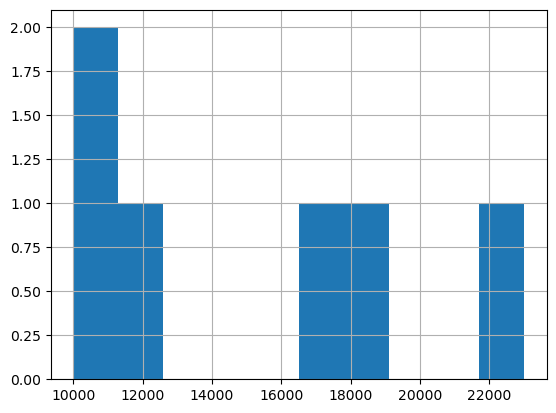

In [85]:
%matplotlib inline

data['sal'].hist()

### Data aggregation over a data frame

In [86]:
data

,empid,ename,sal,doj,hike
0,1001,Ganesh Rao,10000.00,10-10-2000,11000.00
1,1002,Anil Kumar,23000.50,3-3-2002,24000.50
2,1003,Gaurav Gupta,18000.33,3-3-2002,19000.33
3,1004,Hema Chandra,16500.50,3-3-2002,17500.50
4,1005,Laxmi Prasanna,12000.75,10-8-2000,13000.75
5,1006,Anant Nag,9999.99,9-9-1999,10999.99
